In [4]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

## Custom Function Definition

In [5]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)



def get_colors(y):
    return [data_colors[label] for label in y]

def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test)) #concatenate 배열을 하나로 합침
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(8, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()  ## get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)   ## ravel()은 flatten() 함수
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

## Linearly separable dataset

#### SVC() : Support Vector Classification  
    - Suitable for the linearly separable dataset
    - This algorithm seeks for the most optimal Linear Decision Boundary to split to binary data

### 1. Loading data
### 2. Shuffle data

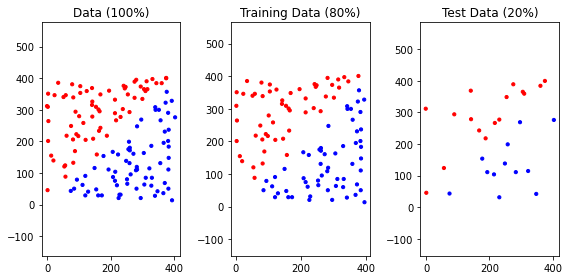

In [7]:
X, labels = read_data("../down/points_class_0.txt", "../down/points_class_1.txt")
# Using User-defined function read_data in the above cell to read txt file

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)
# Shuffle data

plot_data(X_train, y_train, X_test, y_test)
# Using User-defined function plot_data in the above cell to draw three diagrams

### 3. Generating a (linear)SVM model 
### 4. Training model
### 5. Predict

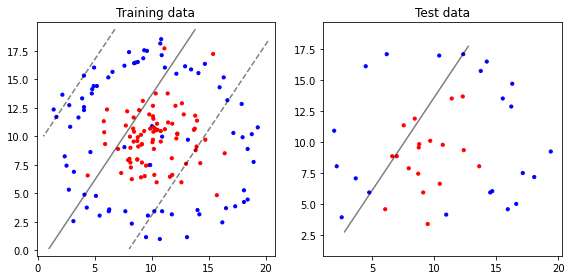

In [12]:
clf = svm.SVC(kernel='linear')  
# Generating SVM model

clf.fit(X_train, y_train)
# Train

clf_predictions = clf.predict(X_test)
# Predict

plot_decision_function(X_train, y_train, X_test, y_test, clf)

## Linearly unsaparable dataset
    cost, gamma  used

### 1. Loading data
### 2. Shuffle data

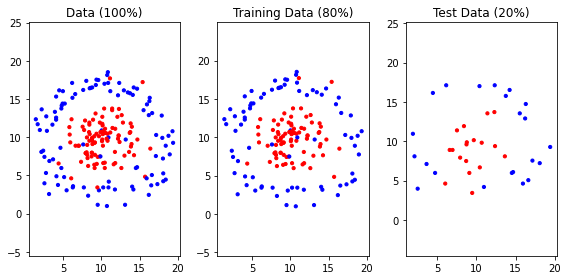

In [9]:
X, labels = read_data("../down/points_class_0_nonLinear.txt", "../down/points_class_1_nonLinear.txt")
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)
plot_data(X_train, y_train, X_test, y_test)

### 3. Generating a SVM model 
    As shown in the plot below, linear SVM model can't split data properly
    Thus cost needs to be adjusted
   
### 4. Training model
### 5. Predict

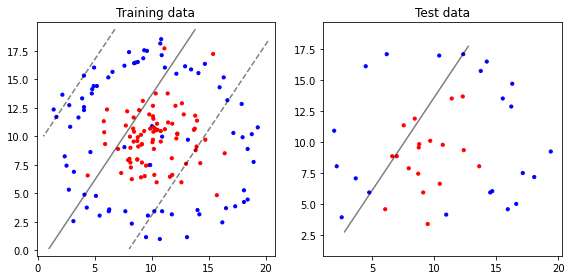

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

clf_predictions = clf.predict(X_test)
plot_decision_function(X_train, y_train, X_test, y_test, clf)

### 3. Generating a Gaussian Radial Basis (RBF) model 
    gamma and cost (C) are used for hyperparameters
    No more linear SVM model 
   
### 4. Training model
### 5. Predict

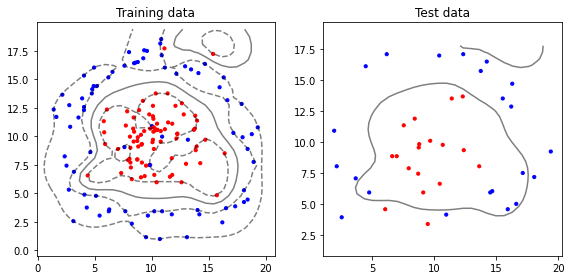

In [13]:
clf = svm.SVC(kernel='rbf', C=10.0, gamma=0.2)

clf.fit(X_train, y_train)

clf_predictions = clf.predict(X_test)
plot_decision_function(X_train, y_train, X_test, y_test, clf)

## In Summary 
    -In cluding GridSearchCV 
    - BEFORE creating SVC model, FIRST GridSearchCV ( ) and param_grid are used
    - Resulting SVC model with the most optimal hyperparameters  = clf_grid

Fitting 5 folds for each of 30 candidates, totalling 150 fits


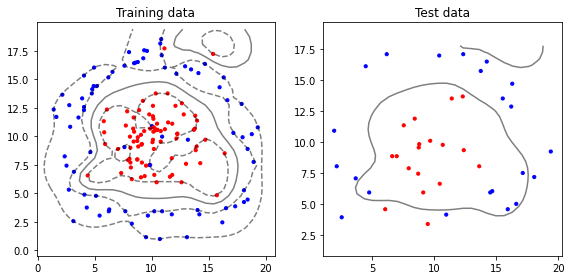

Best Parameters:
 {'C': 20, 'gamma': 0.01}
Best Estmators:
 SVC(C=20, gamma=0.01)


In [14]:
param_grid ={'C':[20,0.1,1,10,100], 'gamma':[0.2,1,0.1,0.01,0.001,10]}

clf_grid=GridSearchCV(svm.SVC(), param_grid, verbose=1)

clf_grid.fit(X_train, y_train)
plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Checking which parameters are chosen for the most optimal values using GridSearchCV 
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estmators:\n", clf_grid.best_estimator_)